In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold, manifold

# MDS 要求降维后 样本之间的距离得到保持

In [2]:
# 使用sklearn自带的鸢尾花分类数据
def load_data():
    iris = datasets.load_iris()
    return iris.data,iris.target

In [3]:
def test_MDS(*data):
    x,y = data
    for n in (4,3,2,1):
        mds = manifold.MDS(n_components=n)
        mds.fit(x)
        # 显示核化矩阵的特征值λ
        print('stress(n_components={0}) :{1}'.format(n,str(mds.stress_)))


In [7]:
x,y =load_data()
test_MDS(x,y)

stress(n_components=4) :11.73184624909949
stress(n_components=3) :15.742512147755116
stress(n_components=2) :190.51385259281116
stress(n_components=1) :987.9013321892769


In [10]:
# 将数据降低至2维
def plot_mds(*data):
    x,y = data
    mds = manifold.MDS(n_components=2)
    x_r = mds.fit_transform(x)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
#     colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    colors=((1,0,0),(0,1,0),(0,0,1))
    for label,color in zip(np.unique(y),colors):
        position =y==label
        ax.scatter(x_r[position,0],x_r[position,1],label='target={0}'.format(label),color=color)
    
    ax.set_xlabel('X[0]')
    ax.set_ylabel('Y[0]')
    ax.legend(loc='best')
    ax.set_title('MDS')
    plt.show()

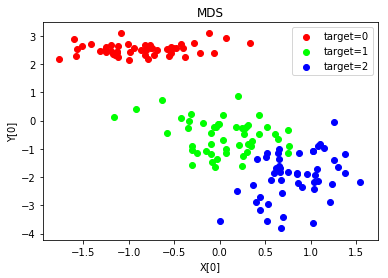

In [17]:
x,y =load_data()
plot_mds(x,y)